In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import boxcox
#from matplotlib.mlab import PCA as mlabPCA #somehow im not getting it to work..
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings


warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)



# no need for an open connection, 
# as we're only doing a single query
engine.dispose() # data set loaded

# 2938 rows × 22 columns
# 1649 rows × 22 columns #after dropna

In [ ]:
# GOAL : find factors that affect life expectancy
# find which increase expected life in countries 
# + which factors decrease it

Text(0.5, 1.0, 'Relationship of Life Expectancy and Percentage Expenditure')

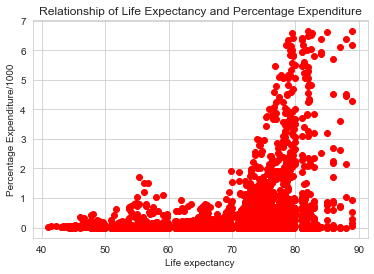

In [89]:
#POS CORREL: #LIFE EXPECTANCY AND PERCENTAGE EXPENDITURE

#only keeping rows in df that ARE NOT the outliers
#wanna take out the outliers bc they might skew the average

#df_1 is df without rows that have "lower outliers" from df['Life expectancy ']
df_1 = df[(df['Life expectancy '] >= ((df['Life expectancy '].mean()) - (df['Life expectancy '].std())*3))]
#df_2 is df without rows that have "upper outliers" from df['Life expectancy ']
df_2 = df_1[df_1['Life expectancy '] <= (df_1['Life expectancy '].mean()) + (df_1['Life expectancy '].std())*3]
#df_3 is df without rows that have "lower outliers" from df['percentage expenditure']
df_3 = df_2[(df_2['percentage expenditure'] >= ((df_2['percentage expenditure'].mean()) - (df_2['percentage expenditure'].std())*3))]
#df_4 is df without rows that have "upper outliers" from df['percentage expenditure']
df_4 = df_3[df_3['percentage expenditure'] <= (df_3['percentage expenditure'].mean()) + (df_3['percentage expenditure'].std())*3]


#fillna for empty rows in columns with median

df_4['Life expectancy '].fillna(df_4['Life expectancy '].median())
df_4['percentage expenditure'].fillna(df_4['percentage expenditure'].median())


#PLOT
plt.scatter(x=df_4['Life expectancy '], y=df_4['percentage expenditure']/1000, color = 'red')
plt.xlabel('Life expectancy')
plt.ylabel('Percentage Expenditure/1000')
plt.title('Relationship of Life Expectancy and Percentage Expenditure')
# in countries with high life expectancy, there is jump in percentage expenditure

Text(0.5, 1.0, 'Relationship of Life Expectancy and HIV/AIDS')

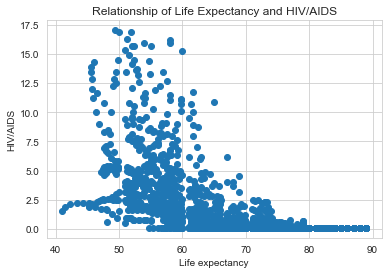

In [64]:
#LIFE EXPECTANCY AND HIV/AIDS

#only keeping rows in df that ARE NOT the outliers
#wanna take out the outliers bc they might skew the average

#df_1 is df without rows that have "lower outliers" from df['Life expectancy ']
df_1 = df[(df['Life expectancy '] >= ((df['Life expectancy '].mean()) - (df['Life expectancy '].std())*3))]
#df_2 is df without rows that have "upper outliers" from df['Life expectancy ']
df_2 = df_1[df_1['Life expectancy '] <= (df_1['Life expectancy '].mean()) + (df_1['Life expectancy '].std())*3]

#df_3 is df without rows that have "lower outliers" from df[' HIV/AIDS']
df_3 = df_2[(df_2[' HIV/AIDS'] >= ((df_2[' HIV/AIDS'].mean()) - (df_2[' HIV/AIDS'].std())*3))]
#df_4 is df without rows that have "upper outliers" from df[' HIV/AIDS']
df_4 = df_3[df_3[' HIV/AIDS'] <= (df_3[' HIV/AIDS'].mean()) + (df_3[' HIV/AIDS'].std())*3]


#fillna for empty rows in columns with median

df_4['Life expectancy '].fillna(df_4['Life expectancy '].median())
df_4[' HIV/AIDS'].fillna(df_4[' HIV/AIDS'].median())


#PLOT
plt.scatter(x=df_4['Life expectancy '], y=df_4[' HIV/AIDS'])
plt.xlabel('Life expectancy')
plt.ylabel('HIV/AIDS')
plt.title('Relationship of Life Expectancy and HIV/AIDS')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

Text(0.5, 1.0, 'Relationship of Life Expectancy and Alcohol')

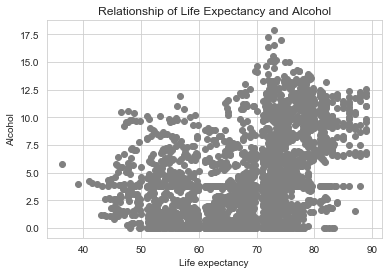

In [77]:
df['Alcohol'].fillna(df['Alcohol'].median(), inplace=True)
plt.scatter(x=df['Life expectancy '], y=df['Alcohol'], color = 'gray')
plt.xlabel('Life expectancy')
plt.ylabel('Alcohol')
plt.title('Relationship of Life Expectancy and Alcohol')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

# NO RELATIONSHIP

Text(0.5, 1.0, 'Relationship of Life Expectancy and GDP')

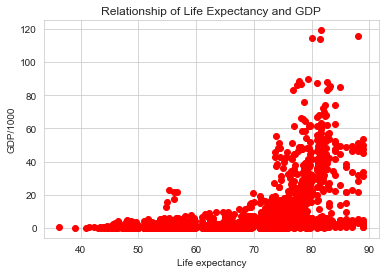

In [76]:
#LIFE EXPECTANCY AND GDP

#only keeping rows in df that ARE NOT the outliers
#wanna take out the outliers bc they might skew the average

#df_1 is df without rows that have "lower outliers" from df['Life expectancy ']
df_1 = df[(df['Life expectancy '] >= ((df['Life expectancy '].mean()) - (df['Life expectancy '].std())*3))]
#df_2 is df without rows that have "upper outliers" from df['Life expectancy ']
df_2 = df_1[df_1['Life expectancy '] <= (df_1['Life expectancy '].mean()) + (df_1['Life expectancy '].std())*3]

#df_3 is df without rows that have "lower outliers" from df['GDP']
df_3 = df_2[(df_2['GDP'] >= ((df_2['GDP'].mean()) - (df_2['GDP'].std())*3))]
#df_4 is df without rows that have "upper outliers" from df['GDP']
df_4 = df_3[df_3['GDP'] <= (df_3['GDP'].mean()) + (df_3['GDP'].std())*3]


#fillna for empty rows in columns with median

df_4['Life expectancy '].fillna(df_4['Life expectancy '].median())
df_4['GDP'].fillna(df_4['GDP'].median())

#PLOT
plt.scatter(x=df['Life expectancy '], y=df['GDP']/1000, color = 'red')
plt.xlabel('Life expectancy')
plt.ylabel('GDP/1000')
plt.title('Relationship of Life Expectancy and GDP')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

Text(0.5, 1.0, 'Relationship of Life Expectancy and Schooling')

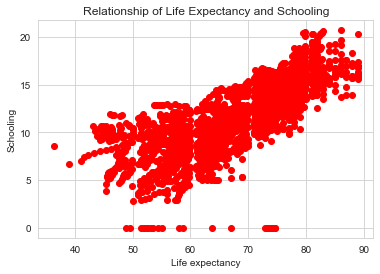

In [75]:
#LIFE EXPECTANCY AND SCHOOLING

#only keeping rows in df that ARE NOT the outliers
#wanna take out the outliers bc they might skew the average

#df_1 is df without rows that have "lower outliers" from df['Life expectancy ']
df_1 = df[(df['Life expectancy '] >= ((df['Life expectancy '].mean()) - (df['Life expectancy '].std())*3))]
#df_2 is df without rows that have "upper outliers" from df['Life expectancy ']
df_2 = df_1[df_1['Life expectancy '] <= (df_1['Life expectancy '].mean()) + (df_1['Life expectancy '].std())*3]

#df_3 is df without rows that have "lower outliers" from df['Schooling']
df_3 = df_2[(df_2['Schooling'] >= ((df_2['Schooling'].mean()) - (df_2['Schooling'].std())*3))]
#df_4 is df without rows that have "upper outliers" from df['Schooling']
df_4 = df_3[df_3['Schooling'] <= (df_3['Schooling'].mean()) + (df_3['Schooling'].std())*3]


#fillna for empty rows in columns with median

df_4['Life expectancy '].fillna(df_4['Life expectancy '].median())
df_4['Schooling'].fillna(df_4['Schooling'].median())

#PLOT
plt.scatter(x=df['Life expectancy '], y=df['Schooling'], color = 'red')
plt.xlabel('Life expectancy')
plt.ylabel('Schooling')
plt.title('Relationship of Life Expectancy and Schooling')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

Text(0.5, 1.0, 'Relationship of Life Expectancy and Income Composition of Resources')

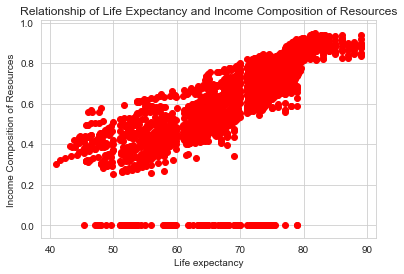

In [79]:
#POS CORREL: LIFE EXPECTANCY AND INCOME COMPOSITION OF RESOURCES

#only keeping rows in df that ARE NOT the outliers
#wanna take out the outliers bc they might skew the average

#df_1 is df without rows that have "lower outliers" from df['Life expectancy ']
df_1 = df[(df['Life expectancy '] >= ((df['Life expectancy '].mean()) - (df['Life expectancy '].std())*3))]
#df_2 is df without rows that have "upper outliers" from df['Life expectancy ']
df_2 = df_1[df_1['Life expectancy '] <= (df_1['Life expectancy '].mean()) + (df_1['Life expectancy '].std())*3]

#df_3 is df without rows that have "lower outliers" from df['Income composition of resources']
df_3 = df_2[(df_2['Income composition of resources'] >= ((df_2['Income composition of resources'].mean()) - (df_2['Income composition of resources'].std())*3))]
#df_4 is df without rows that have "upper outliers" from df['Income composition of resources']
df_4 = df_3[df_3['Income composition of resources'] <= (df_3['Income composition of resources'].mean()) + (df_3['Income composition of resources'].std())*3]


#fillna for empty rows in columns with median

df_4['Life expectancy '].fillna(df_4['Life expectancy '].median())
df_4['Income composition of resources'].fillna(df_4['Income composition of resources'].median())

#PLOT
plt.scatter(x=df_4['Life expectancy '], y=df_4['Income composition of resources'], color = 'red')
plt.xlabel('Life expectancy')
plt.ylabel('Income Composition of Resources')
plt.title('Relationship of Life Expectancy and Income Composition of Resources')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

Text(0.5, 1.0, 'Relationship of Life Expectancy and Thinness (1-19 years)')

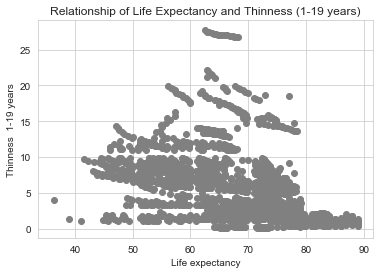

In [71]:
#NO RELATIONSHIP

df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].median(), inplace=True)
plt.scatter(x=df['Life expectancy '], y=df[' thinness  1-19 years'], color = 'gray')
plt.xlabel('Life expectancy')
plt.ylabel('Thinness  1-19 years')
plt.title('Relationship of Life Expectancy and Thinness (1-19 years)')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

Text(0.5, 1.0, 'Relationship of Life Expectancy and Diphtheria')

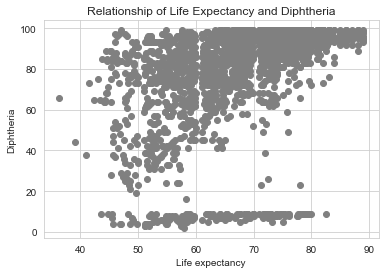

In [72]:
# NO RELATIONSHIP
df['Diphtheria '].fillna(df['Diphtheria '].median(), inplace=True)
plt.scatter(x=df['Life expectancy '], y=df['Diphtheria '], color = 'gray')
plt.xlabel('Life expectancy')
plt.ylabel('Diphtheria')
plt.title('Relationship of Life Expectancy and Diphtheria')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

Text(0, 0.5, 'Polio')

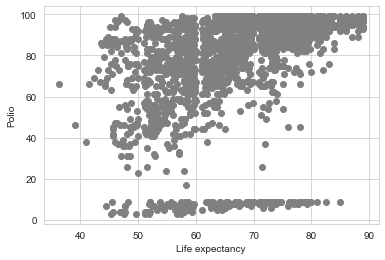

In [74]:
#NO RELATIONSHIP

df['Polio'].fillna(df['Polio'].median(), inplace=True)
plt.scatter(x=df['Life expectancy '], y=df['Polio'], color = 'gray')
plt.xlabel('Life expectancy')
plt.ylabel('Polio')
#plt.title('Relationship of Life Expectancy and Polio')
# in countries with high life expectancy, there is jump in percentage expenditure
# correlation coeff

In [131]:
df_Philippines_only = df.loc[df['Country'] == 'Philippines']
#print (df_Philippines_only)

In [107]:
#select columns
df_Philippines_selectedCols = df_Philippines_only.filter(['Life expectancy ','Total expenditure','Year'])
df_Philippines_selectedCols.dropna()

,Life expectancy,Total expenditure,Year
2025,68.4,4.71,2014
2026,68.1,4.56,2013
2027,68.1,4.46,2012
2028,68.0,4.29,2011
2029,67.9,4.37,2010
2030,68.0,4.41,2009
2031,67.5,4.50,2008
2032,67.5,3.94,2007
2033,67.3,3.95,2006
2034,67.0,3.91,2005


Text(0.5, 1.0, 'Relationship of Life Expectancy and Percentage Expenditure in the Philippines (2000-2014)')

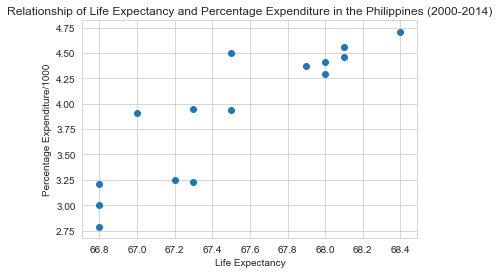

In [127]:
plt.scatter(x=df_Philippines_selectedCols['Life expectancy '], y=df_Philippines_selectedCols['Total expenditure'])
plt.xlabel('Life Expectancy')
plt.ylabel('Percentage Expenditure/1000')
plt.title('Relationship of Life Expectancy and Percentage Expenditure in the Philippines (2000-2014)')

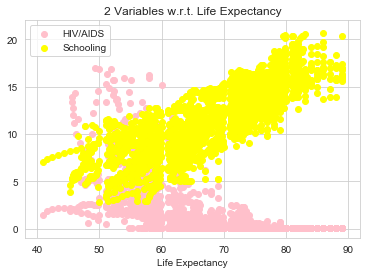

In [87]:
# Overlay HIV/AIDS and SCHOOLING on LIFE EXPECTANCY in X axis


#only keeping rows in df that ARE NOT the outliers
#wanna take out the outliers bc they might skew the average

#df_1 is df without rows that have "lower outliers" from df['Life expectancy ']
df_1 = df[(df['Life expectancy '] >= ((df['Life expectancy '].mean()) - (df['Life expectancy '].std())*3))]
#df_2 is df without rows that have "upper outliers" from df['Life expectancy ']
df_2 = df_1[df_1['Life expectancy '] <= (df_1['Life expectancy '].mean()) + (df_1['Life expectancy '].std())*3]

#df_3 is df without rows that have "lower outliers" from df['Schooling']
df_3 = df_2[(df_2['Schooling'] >= ((df_2['Schooling'].mean()) - (df_2['Schooling'].std())*3))]
#df_4 is df without rows that have "upper outliers" from df['Schooling']
df_4 = df_3[df_3['Schooling'] <= (df_3['Schooling'].mean()) + (df_3['Schooling'].std())*3]


#df_5 is df without rows that have "lower outliers" from df[' HIV/AIDS']
df_5 = df_4[(df_4[' HIV/AIDS'] >= ((df_4[' HIV/AIDS'].mean()) - (df_4[' HIV/AIDS'].std())*3))]
#df_6 is df without rows that have "upper outliers" from df[' HIV/AIDS']
df_6 = df_5[df_5[' HIV/AIDS'] <= (df_5[' HIV/AIDS'].mean()) + (df_5[' HIV/AIDS'].std())*3]


#fillna for empty rows in columns with median

df_6['Life expectancy '].fillna(df_6['Life expectancy '].median())
df_6['Schooling'].fillna(df_6['Schooling'].median())

#PLOT

y_1=df_6[' HIV/AIDS']
y_2=df_6['Schooling']


plt.scatter(x=df_6['Life expectancy '], y=y_1, color='pink', label = 'HIV/AIDS')
plt.scatter(x=df_6['Life expectancy '], y=y_2, color='yellow', label = 'Schooling' ) 
plt.xlabel('Life Expectancy')
plt.legend()
plt.title('2 Variables w.r.t. Life Expectancy')

plt.show() 

In [ ]:
#FEATURE ENGINEERING STEP

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
from scipy.stats.mstats import winsorize

In [7]:
df = pd.concat([df, pd.get_dummies(df["Country"])], axis=1) # Country recoded into numbers
df = pd.concat([df, pd.get_dummies(df["Status"])], axis=1) # Status recoded into numbers

In [8]:
# use winsorize as function to put all variables according to the same scale

In [9]:
#handle the blanks
df["Year"].fillna(df["Year"].median(), inplace=True)
df["Life expectancy "].fillna(df["Life expectancy "].median(), inplace=True)
df["Adult Mortality"].fillna(df["Adult Mortality"].median(), inplace=True)
df["infant deaths"].fillna(df["infant deaths"].median(), inplace=True)

df["Alcohol"].fillna(df["Alcohol"].median(), inplace=True)
df["percentage expenditure"].fillna(df["percentage expenditure"].median(), inplace=True)
df["Hepatitis B"].fillna(df["Hepatitis B"].median(), inplace=True)
df[" BMI "].fillna(df[" BMI "].median(), inplace=True)

df["under-five deaths "].fillna(df["under-five deaths "].median(), inplace=True)
df["Polio"].fillna(df["Polio"].median(), inplace=True)
df["Total expenditure"].fillna(df["Total expenditure"].median(), inplace=True)
df["Diphtheria "].fillna(df["Diphtheria "].median(), inplace=True)

df[" HIV/AIDS"].fillna(df[" HIV/AIDS"].median(), inplace=True)
df["GDP"].fillna(df["GDP"].median(), inplace=True)
df["Population"].fillna(df["Population"].median(), inplace=True)
df[" thinness  1-19 years"].fillna(df[" thinness  1-19 years"].median(), inplace=True)

df[" thinness 5-9 years"].fillna(df[" thinness 5-9 years"].median(), inplace=True)
df["Income composition of resources"].fillna(df["Income composition of resources"].median(), inplace=True)
#df["Population"].fillna(df["Population"].median(), inplace=True)
df["Schooling"].fillna(df["Schooling"].median(), inplace=True)

In [10]:
# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 

df["winsorized_Year"] = winsorized_views = winsorize(df["Year"], (0, 0.10))
df["winsorized_Life expectancy "] = winsorized_views = winsorize(df["Life expectancy "], (0, 0.10))
df["winsorized_Adult Mortality"] = winsorized_views = winsorize(df["Adult Mortality"], (0, 0.10))
df["winsorized_infant deaths"] = winsorized_views = winsorize(df["infant deaths"], (0, 0.10))

df["winsorized_Alcohol"] = winsorized_views = winsorize(df["Alcohol"], (0, 0.10))
df["winsorized_percentage expenditure"] = winsorized_views = winsorize(df["percentage expenditure"], (0, 0.10))
df["winsorized_Hepatitis B"] = winsorized_views = winsorize(df["Hepatitis B"], (0, 0.10))
df["winsorized_BMI"] = winsorized_views = winsorize(df[" BMI "], (0, 0.10))

df["winsorized_under-five deaths "] = winsorized_views = winsorize(df["under-five deaths "], (0, 0.10))
df["winsorized_Polio"] = winsorized_views = winsorize(df["Polio"], (0, 0.10))
df["winsorized_Total expenditure"] = winsorized_views = winsorize(df["Total expenditure"], (0, 0.10))
df["winsorized_Diphtheria "] = winsorized_views = winsorize(df["Diphtheria "], (0, 0.10))

df["winsorized_ HIV/AIDS "] = winsorized_views = winsorize(df[" HIV/AIDS"], (0, 0.10))
df["winsorized_GDP"] = winsorized_views = winsorize(df["GDP"], (0, 0.10))
df["winsorized_Population"] = winsorized_views = winsorize(df["Population"], (0, 0.10))
df["winsorized_ thinness  1-19 years"] = winsorized_views = winsorize(df[" thinness  1-19 years"], (0, 0.10))

df["winsorized_ thinness 5-9 years"] = winsorized_views = winsorize(df[" thinness 5-9 years"], (0, 0.10))
df["winsorized_Income composition of resources"] = winsorized_views = winsorize(df["Income composition of resources"], (0, 0.10))
#df["winsorized_Population"] = winsorized_views = winsorize(df["Population"], (0, 0.10))
df["winsorized_Schooling"] = winsorized_views = winsorize(df["Schooling"], (0, 0.10))

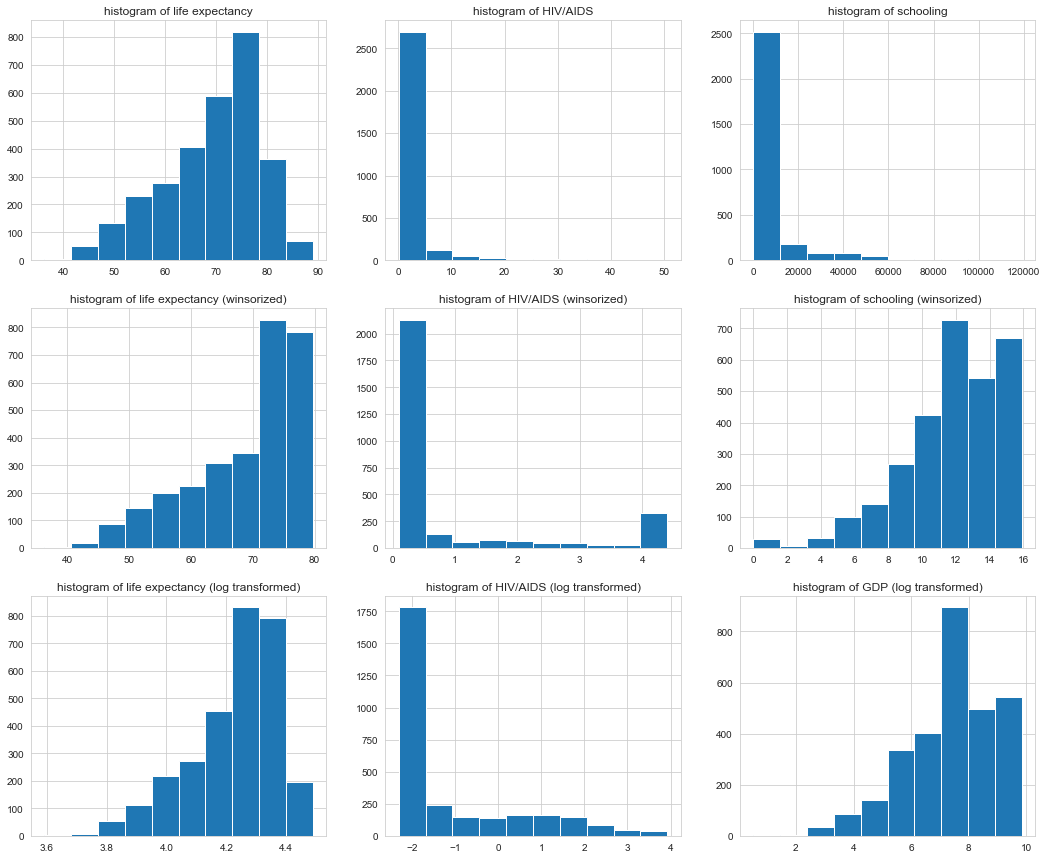

In [11]:
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(df["Life expectancy "])
plt.title("histogram of life expectancy")

plt.subplot(3, 3, 2)
plt.hist(df[" HIV/AIDS"])
plt.title("histogram of HIV/AIDS")

plt.subplot(3, 3, 3)
plt.hist(df["GDP"])
plt.title("histogram of schooling")

# histograms of the winsorized data
plt.subplot(3, 3, 4)
plt.hist(df["winsorized_Life expectancy "])
plt.title("histogram of life expectancy (winsorized)")

plt.subplot(3, 3, 5)
plt.hist(df["winsorized_ HIV/AIDS "])
plt.title("histogram of HIV/AIDS (winsorized)")

plt.subplot(3, 3, 6)
plt.hist(df["winsorized_Schooling"])
plt.title("histogram of schooling (winsorized)")

# histograms of the log transformed data
plt.subplot(3, 3, 7)
plt.hist(np.log(df["Life expectancy "]))
plt.title("histogram of life expectancy (log transformed)")

plt.subplot(3, 3, 8)
plt.hist(np.log(df[" HIV/AIDS"]))
plt.title("histogram of HIV/AIDS (log transformed)")

plt.subplot(3, 3, 9)
plt.hist(np.log(df["winsorized_GDP"]))
plt.title("histogram of GDP (log transformed)")

plt.show()

In [12]:
# These variables do not look normally distributed



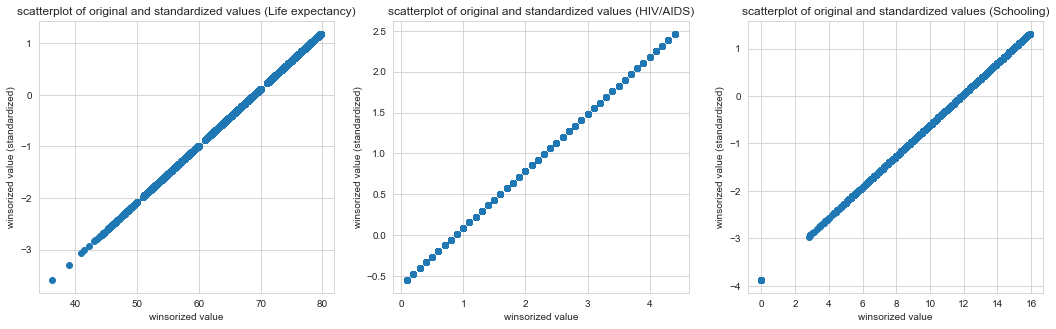

In [13]:
from sklearn.preprocessing import scale

df["scaled_winsorized_Life expectancy "] = scale(df["winsorized_Life expectancy "])
df["scaled_winsorized_ HIV/AIDS "] = scale(df["winsorized_ HIV/AIDS "])
df["scaled_winsorized_Schooling"] = scale(df["winsorized_Schooling"])

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

# draw the heatmap using seaborn.
plt.scatter(df["winsorized_Life expectancy "], df["scaled_winsorized_Life expectancy "])
plt.title("scatterplot of original and standardized values (Life expectancy)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (standardized)")
#plt.xlim(0.00000001)

plt.subplot(1,3,2)
# draw the heatmap using seaborn.
plt.scatter(df["winsorized_ HIV/AIDS "], df["scaled_winsorized_ HIV/AIDS "])
plt.title("scatterplot of original and standardized values (HIV/AIDS)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (standardized)")

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
plt.scatter(df["winsorized_Schooling"], df["scaled_winsorized_Schooling"])
plt.title("scatterplot of original and standardized values (Schooling)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (standardized)")

plt.show()

In [ ]:
# Summarize my findings:
# Schooling and GDP are positively correlated with life expectancy while HIV/AIDS are correlated to low exptancies.